# Explore here

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.tree import DecisionTreeRegressor
from pickle import dump
from sklearn.model_selection import train_test_split


In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


EDA

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
df.shape

(768, 9)

In [62]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
df_duplicated = df.duplicated()
df_duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [65]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


?


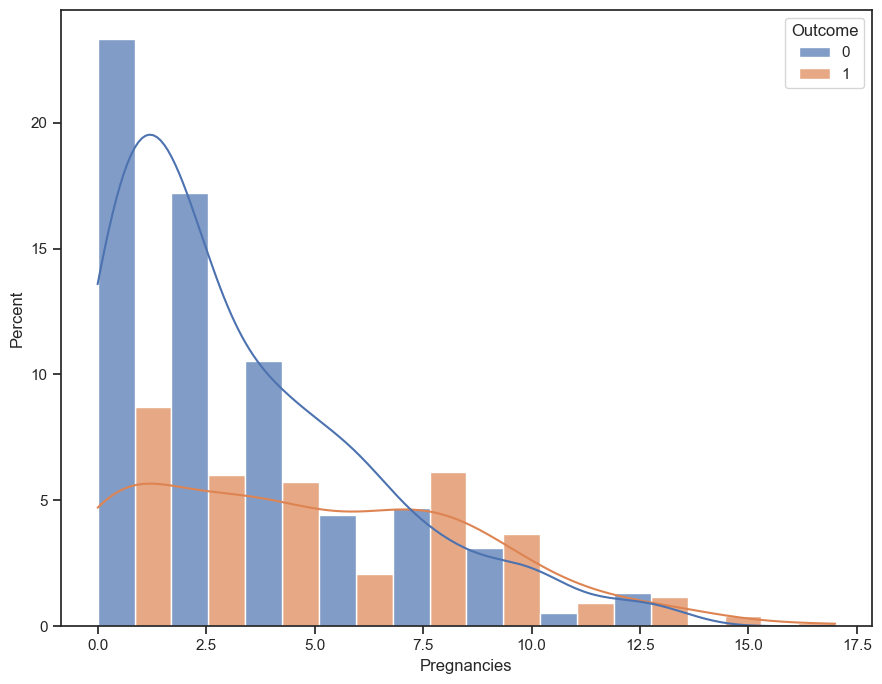

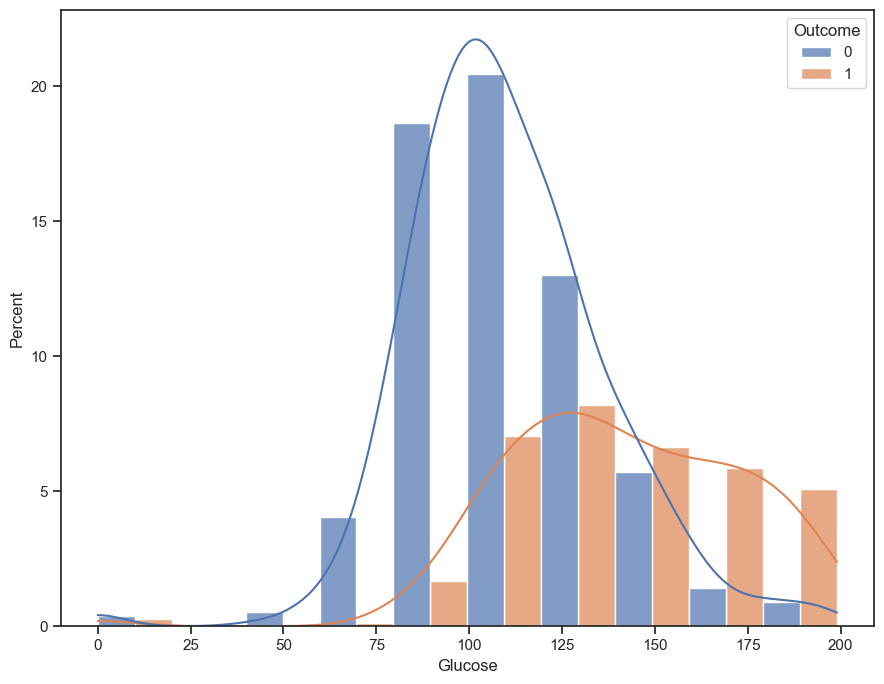

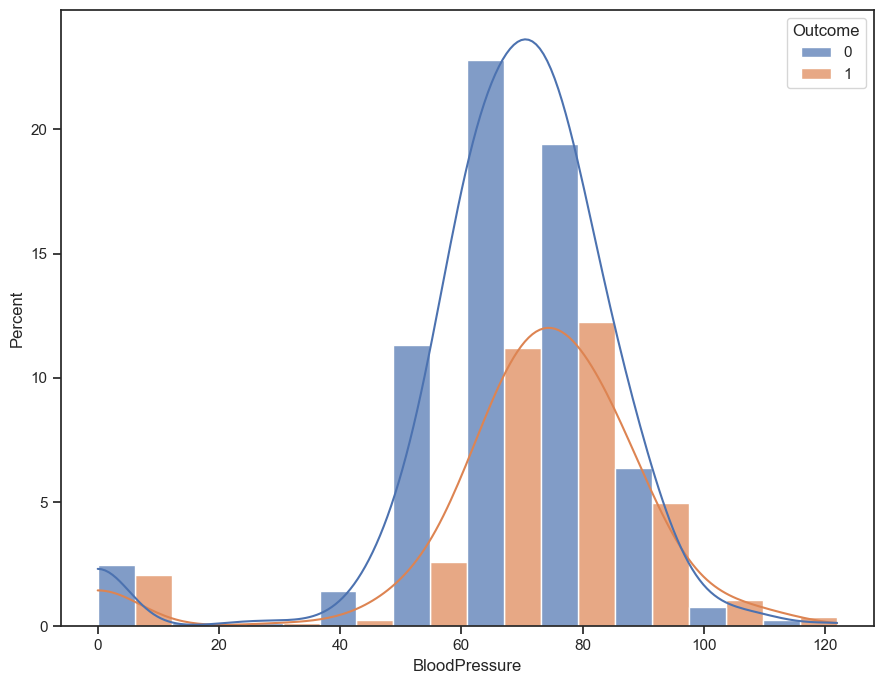

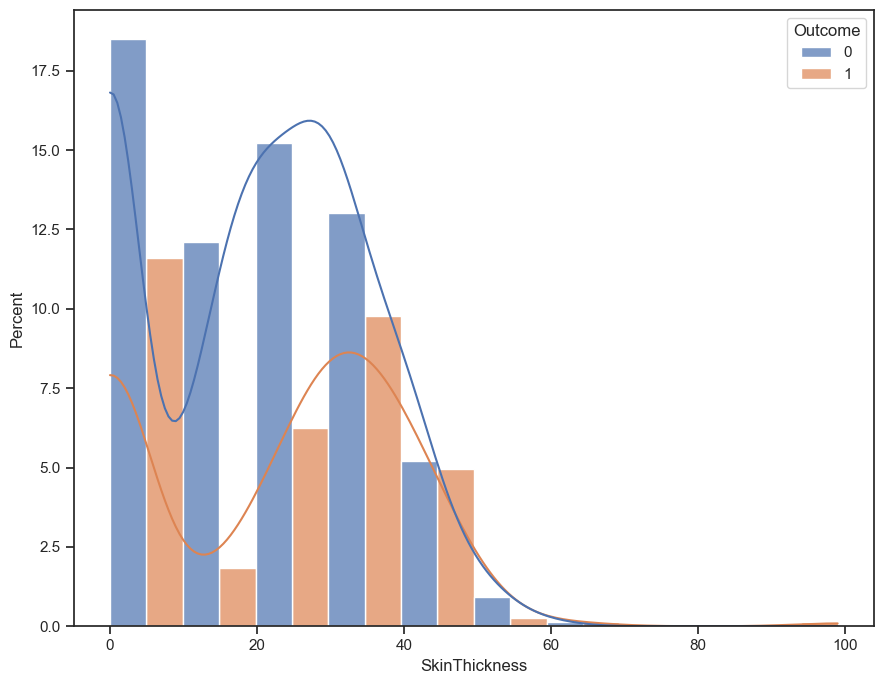

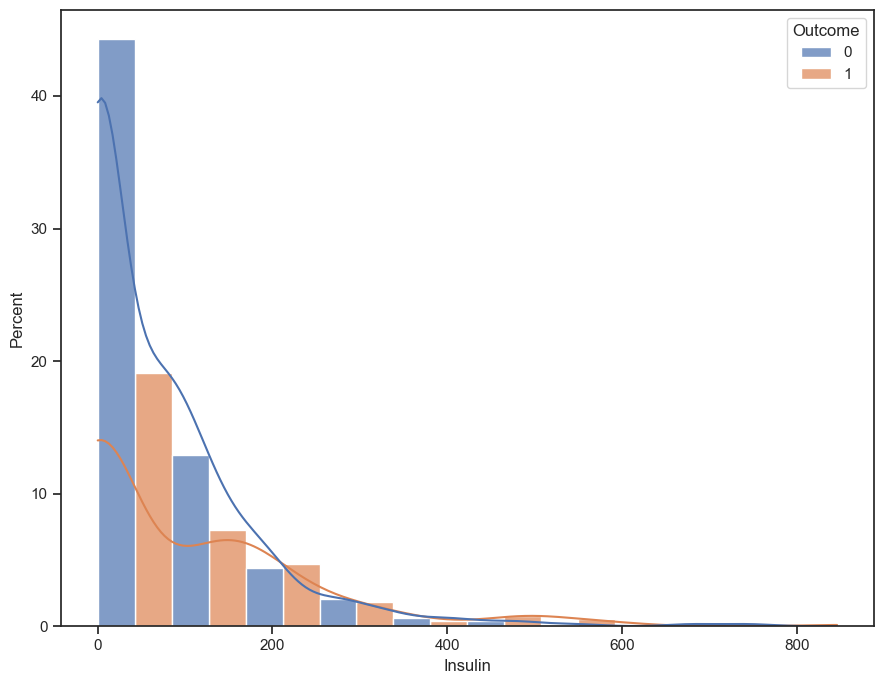

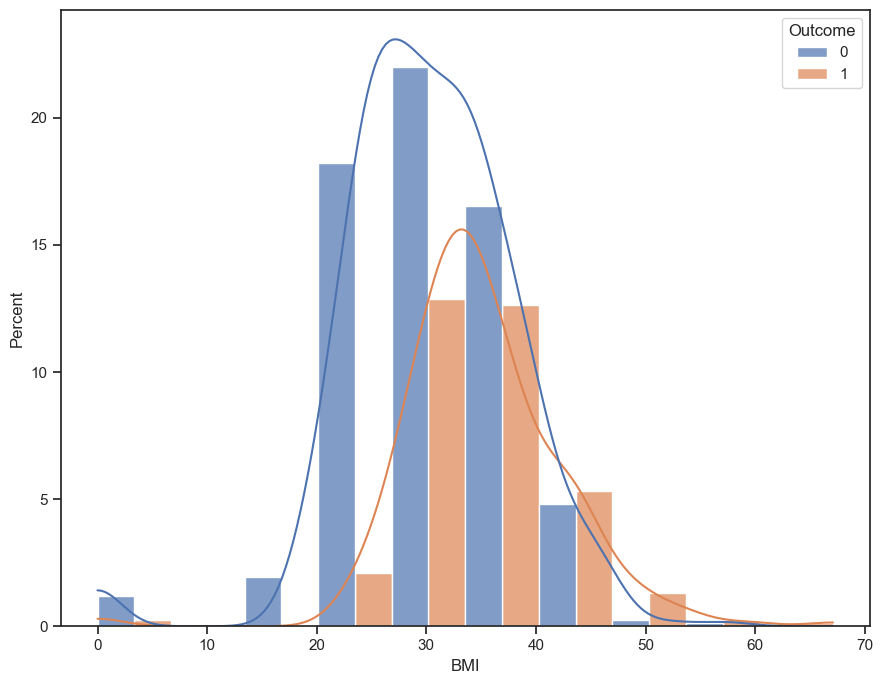

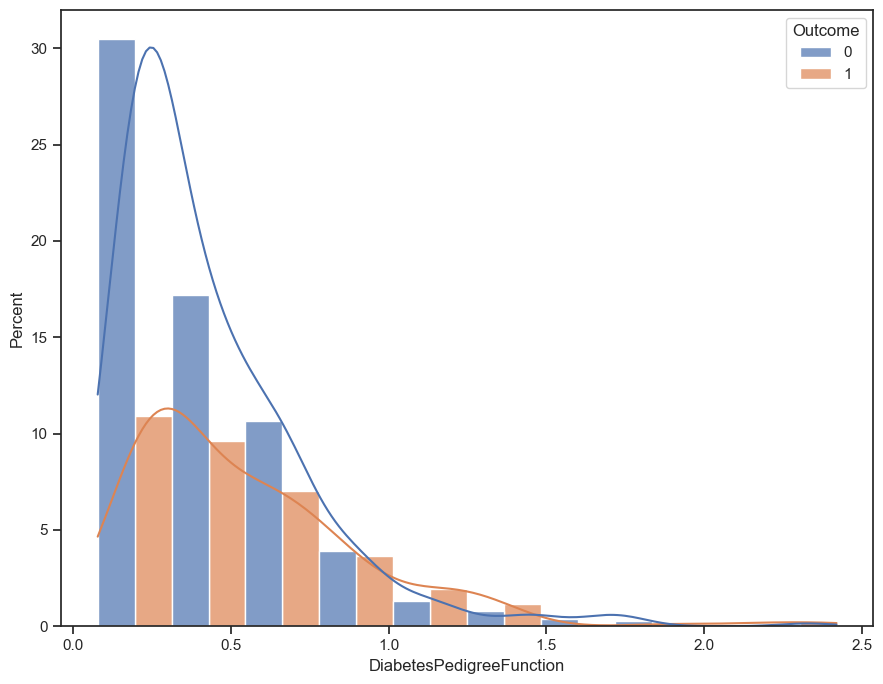

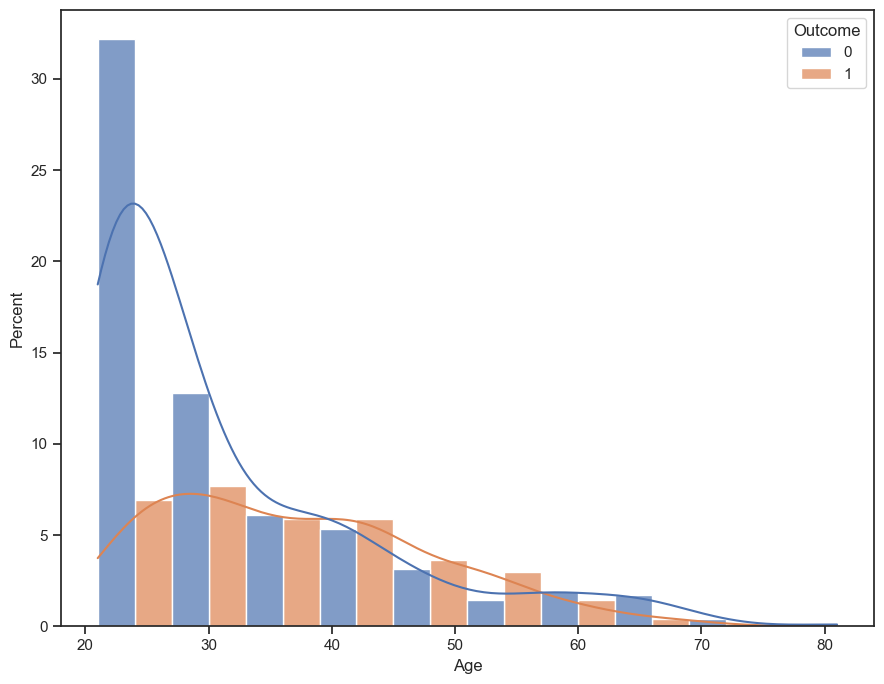

In [67]:
columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
sns.set_theme(style="ticks")
for col in columns:
    plt.figure(figsize=(9, 7))
    sns.histplot(data=df, bins=10, x=col, hue="Outcome", alpha=0.7, multiple="dodge",stat="percent", kde=True)
    plt.tight_layout()
    plt.savefig(f"/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/colum_{col}.png")
    plt.show()

In [68]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [69]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

'''the accuracy on the training set is 100%—because the leaves are pure, but with 70% of test set,suggest that the our tree is overfitting
'''

Accuracy on training set: 1.000
Accuracy on test set: 0.760


'the accuracy on the training set is 100%—because the leaves are pure, but with 70% of test set,suggest that the our tree is overfitting\n'

Apply pre-pruning by limiting the depth of the decision tree

In [70]:
'''
There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collapsing
nodes that contain little information (also called post-pruning or just pruning).
74 | Chapter 2: Supervised Learning, Introduction to Machine Learning with Python
by Andreas C. Müller and Sarah Guido
'''

dt = DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(X_train, y_train)

# Evaluating accuracy on training and test sets
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))


Accuracy on training set: 0.821
Accuracy on test set: 0.766


In [71]:
# Save the training and test data
X_train.to_csv('/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/X_train.csv', index=False)
X_test.to_csv('/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/X_test.csv', index=False)
y_train.to_csv('/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/y_train.csv', index=False)
y_test.to_csv('/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/y_test.csv', index=False)


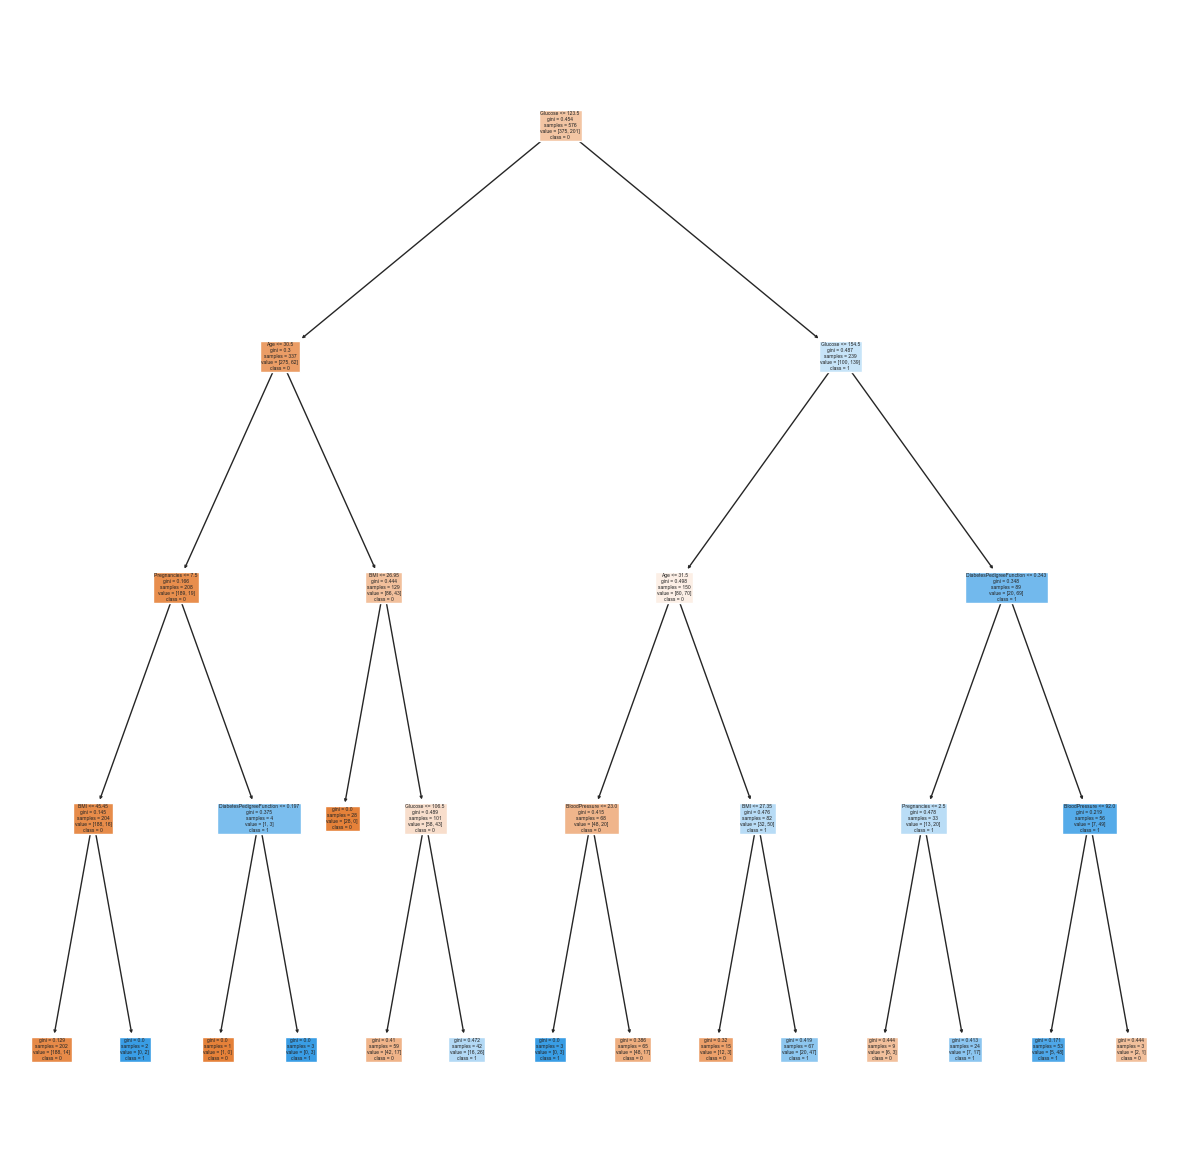

In [72]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(dt, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [73]:
#feature importance, which rates how important each feature is for the decision a tree makes
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.0491857  0.55066096 0.04560258 0.         0.         0.16039392
 0.04117729 0.15297956]


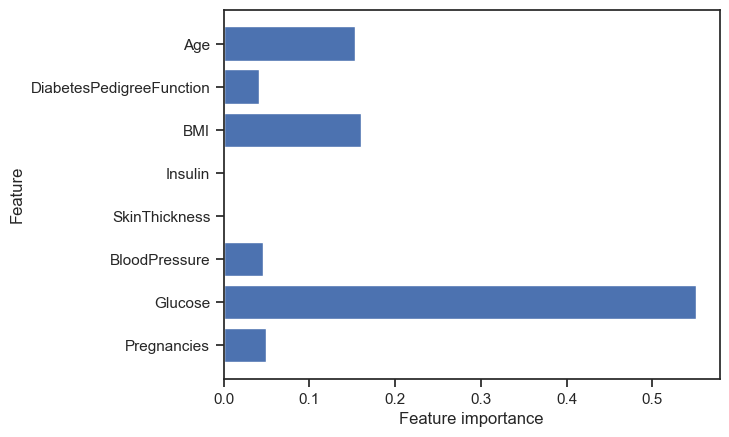

In [74]:
name_features = X_train.columns
lenght_features = len(name_features) 
 
plt.barh(range(lenght_features), dt.feature_importances_, align='center')
plt.yticks(np.arange(lenght_features), name_features) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Model Prediction

In [75]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

Model Evaluation

In [76]:
accuracy_score(y_test, y_pred)

0.765625

In [77]:
confusion_matrix(y_test, y_pred)

array([[106,  19],
       [ 26,  41]])

In [78]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.85      0.82       125\n           1       0.68      0.61      0.65        67\n\n    accuracy                           0.77       192\n   macro avg       0.74      0.73      0.74       192\nweighted avg       0.76      0.77      0.76       192\n'

In [79]:
f1_score(y_test, y_pred)

0.6456692913385826

Saving the model

In [80]:
dump(df, open("/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/decision_tree_classifier_default_4.sav", "wb"))

Decision trees for regression

In [81]:
#getting the same data , we split before
dt_reg = DecisionTreeRegressor(max_depth=4, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [82]:
y_pred = dt_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.294662800502804

In [83]:
mse = mean_squared_error(y_test, y_pred)
mse

0.160243029670926

In [84]:
dump(dt_reg, open("/Users/nandapop/Documents/Bootcamp/decision-_tree_project/data/processed/decision_tree_regressor_default_4.sav", "wb"))